# 2. Data Preprocessing

## 2.1 Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

## 2.2 Import Dataset

In [2]:
data = pd.read_csv("fraud_oracle.csv")

In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=5)
for train_index1, test_index1 in split1.split(data, data["FraudFound_P"]):
    fraud_train = data.loc[train_index1]
    fraud_val_test = data.loc[test_index1]

fraud_val_test.reset_index(drop=True, inplace=True)
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=5)
for train_index2, test_index2 in split2.split(fraud_val_test, fraud_val_test["FraudFound_P"]):
    fraud_val = fraud_val_test.loc[train_index2]
    fraud_test = fraud_val_test.loc[test_index2]

In [5]:
#final split dataframes
fraud_train.reset_index(drop=True, inplace=True) 
fraud_val.reset_index(drop=True, inplace=True) 
fraud_test.reset_index(drop=True, inplace=True)

In [6]:
data_train = fraud_train.copy()
data_val=fraud_val.copy()
data_test=fraud_test.copy()

## 2.3 Data Preprocessing

### 2.3.1 Drop Irrelevant Columns

In [7]:
data_train= data_train.drop(columns=['PolicyNumber','RepNumber','Year'])
data_test= data_test.drop(columns=['PolicyNumber','RepNumber','Year'])
data_val= data_val.drop(columns=['PolicyNumber','RepNumber','Year'])

In [ ]:
data_train.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Feb,3,Wednesday,Honda,Urban,Monday,Feb,3,Male,Married,...,none,more than 7,36 to 40,No,No,External,none,no change,3 to 4,Collision
1,May,2,Monday,Toyota,Urban,Tuesday,May,2,Male,Married,...,1,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,Collision
2,Dec,1,Tuesday,Toyota,Urban,Friday,Dec,2,Male,Married,...,2 to 4,5 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,Liability
3,Apr,1,Saturday,Mazda,Urban,Wednesday,Apr,1,Male,Single,...,none,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
4,Mar,4,Wednesday,Dodge,Urban,Friday,Mar,4,Male,Married,...,1,more than 7,41 to 50,No,No,External,1 to 2,no change,1 vehicle,Collision


### 2.3.2 Fill in Missing Values

In [8]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

There is no missing value in our dataset

But as we see from the data exploration part:
DayOfWeekClaimed - contains a 0 instead of a day of the week
MonthClaimed - contains a 0 instead of the month
Age - contains a 0 instead of the necessary age
So we will deal with these issues now.

In [9]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(data.loc[(data['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(data.loc[(data['MonthClaimed']=='0')]),' row(s) with a 0') 
print(' ')

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0
 


In [10]:
#Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, I will drop
data_train = data_train.loc[data['DayOfWeekClaimed']!='0']
data_test = data_test.loc[data['DayOfWeekClaimed']!='0']
data_val = data_val.loc[data['DayOfWeekClaimed']!='0']

In [11]:
#how many rows where the feature Age is assigned a zero, 
print(len(data[data['Age']==0]))

320


In [12]:
data.loc[data['Age']==0, 'AgeOfPolicyHolder']
#every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.

7        16 to 17
13       16 to 17
28       16 to 17
31       16 to 17
58       16 to 17
           ...   
15243    16 to 17
15262    16 to 17
15274    16 to 17
15379    16 to 17
15392    16 to 17
Name: AgeOfPolicyHolder, Length: 320, dtype: object

In [13]:
#does the comparision of value for age to the value of the AgeOfPolicyHolder
groupings = []
for holder in data['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)
                        
age_idx = []
rw_idx = []

In [14]:
#Assigns an age of 16.5 to all rows with missing Age values
data_age0_idx = (data_train['Age']==0)
data_train.loc[list(data_age0_idx),'Age']=16.5
data_age0_idx = (data_test['Age']==0)
data_test.loc[list(data_age0_idx),'Age']=16.5
data_age0_idx = (data_val['Age']==0)
data_val.loc[list(data_age0_idx),'Age']=16.5

In [15]:
data_train=data_train.drop(columns=['AgeOfPolicyHolder'])
data_test=data_test.drop(columns=['AgeOfPolicyHolder'])
data_val=data_val.drop(columns=['AgeOfPolicyHolder'])

## 2.4 Variable Correlation

In [16]:
corr = data.corr()['FraudFound_P'].sort_values()

print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age                  -0.029741
Year                 -0.024760
PolicyNumber         -0.020345
WeekOfMonth          -0.011861
RepNumber            -0.007551
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age                  -0.029741
Year                 -0.024760
PolicyNumber         -0.020345
WeekOfMonth          -0.011861
RepNumber            -0.007551
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64


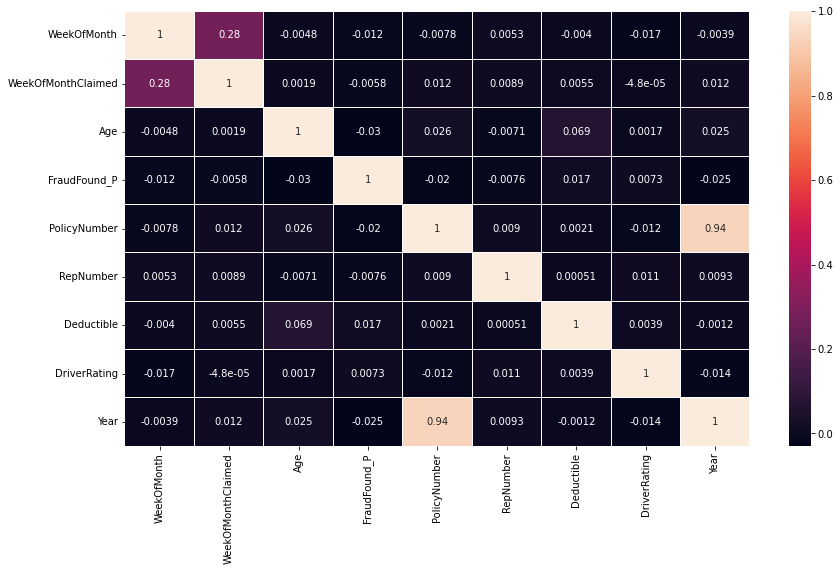

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot = True,  linewidths=.05) 

<font size="3.5">**Insights**</font><br>We consider variables are highly correlated when > 0.80 :<br>
--> there is no high correlation between variables

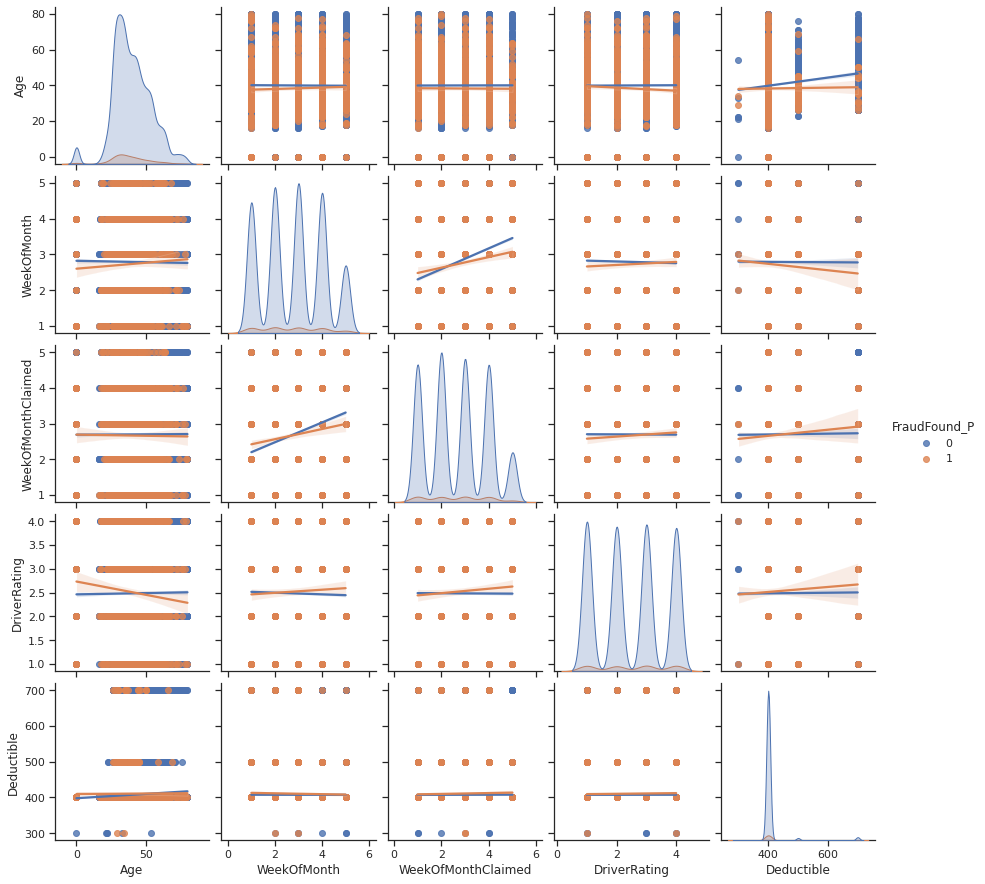

In [18]:
sns.set(style="ticks")
vars= ["Age", "WeekOfMonth", "WeekOfMonthClaimed","DriverRating","Deductible"]
p = pairplot(data, vars=vars, hue="FraudFound_P", kind="reg")

### 2.5.1 Specific data types of Columns

Text(0, 0.5, 'Data type')

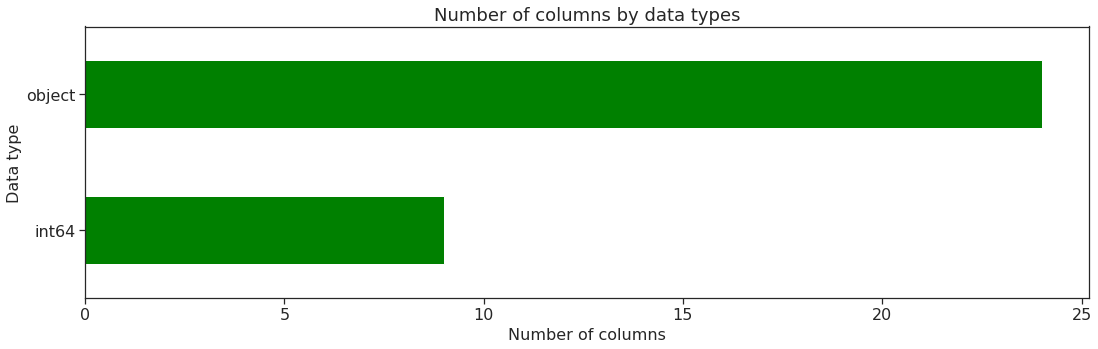

In [19]:
data.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

### 2.5.2 Number of Categories for each object data

In [20]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

### 2.5.3 Visualize Distribution of Categorical Variables

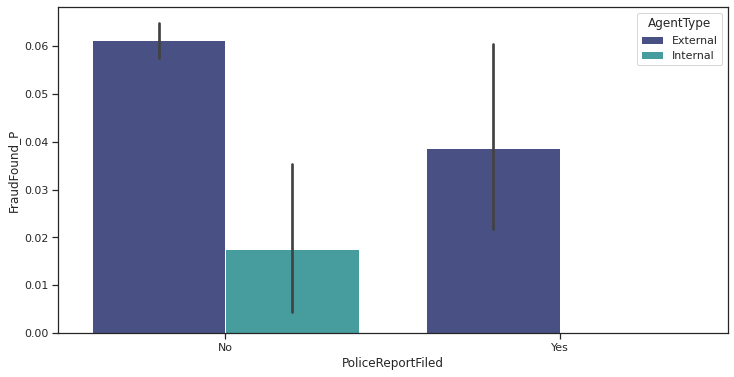

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x="PoliceReportFiled", y= "FraudFound_P", hue="AgentType", data=data,palette='mako')

<font size="3.5">**Insights**</font><br>There is no filed policy report for those who buy auto insurance through internal agent.

Text(0.5, 1.0, 'Number of claim applications are fraudulent')

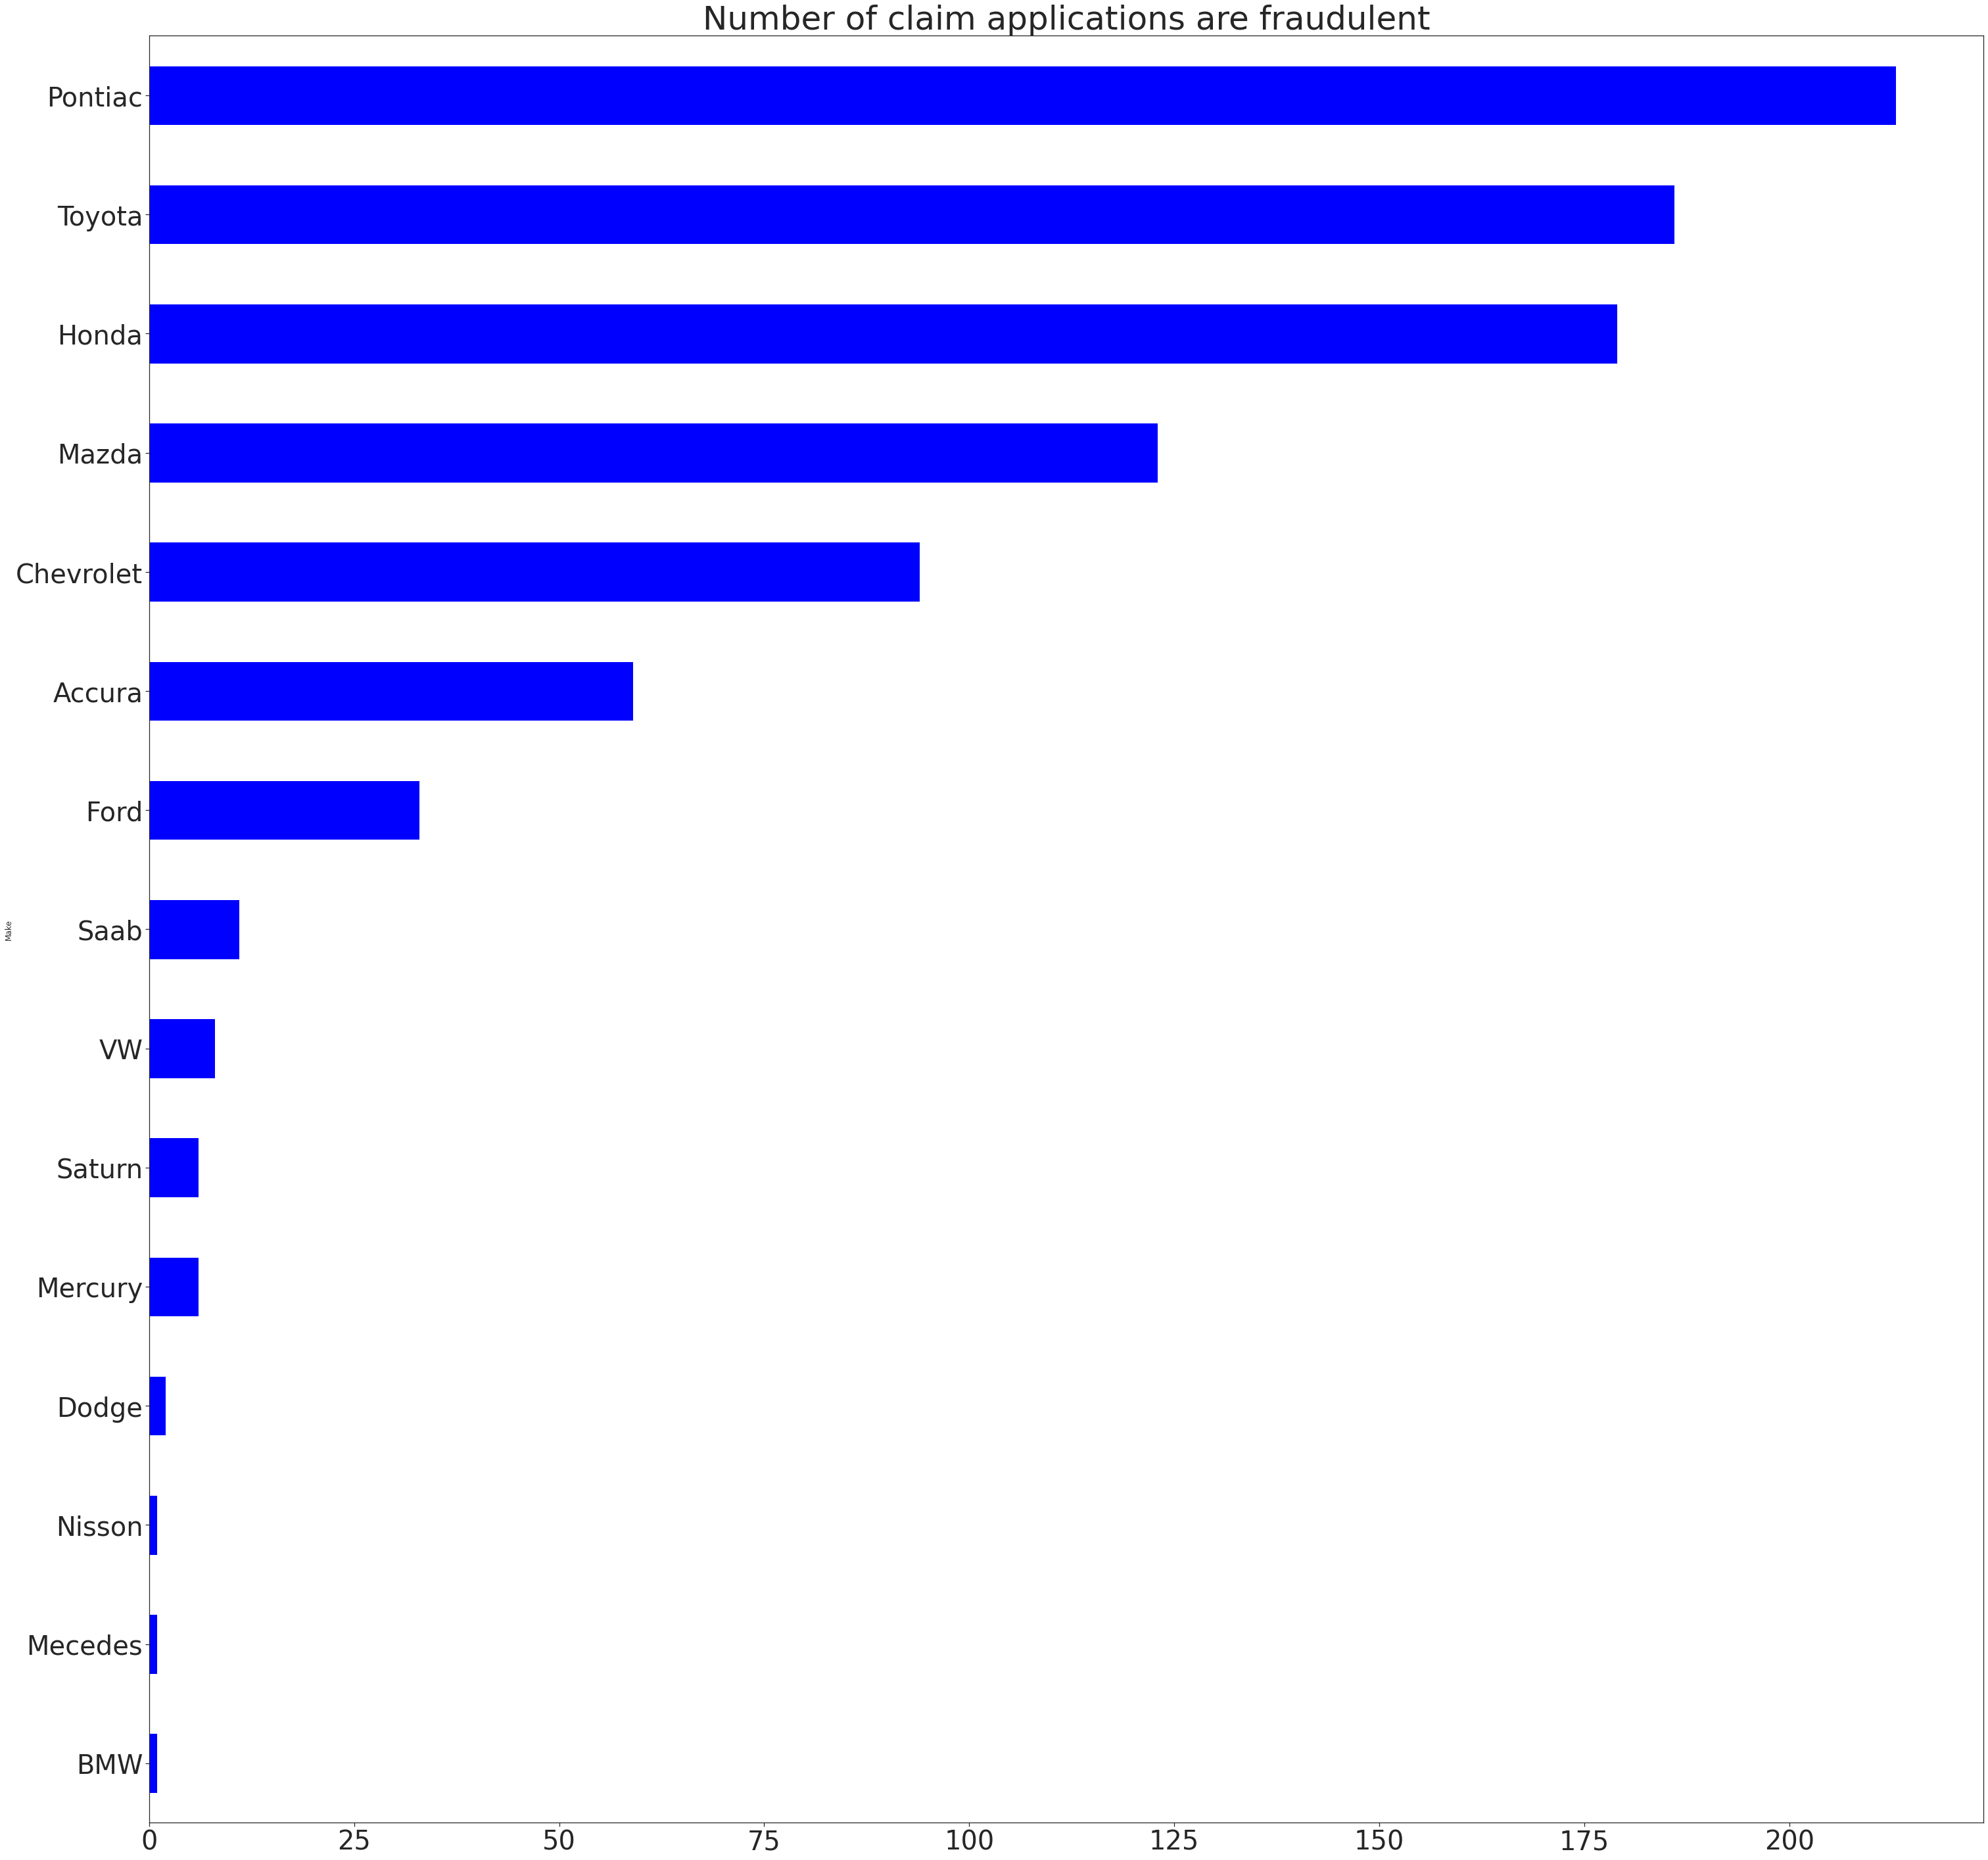

In [22]:
fig = plt.figure(figsize=(50,50))
data[data['FraudFound_P'] == 1].groupby(
    'Make')['FraudFound_P'].count().sort_values().plot(kind='barh',fontsize=40, color="blue")

plt.title('Number of claim applications are fraudulent', fontsize=50)

## 2.6 Encoding Categorical and Standardizing Numeric Variables

ordinal encoding first

In [23]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.6 MB/s eta 0:00:00


In [24]:
from category_encoders.ordinal import OrdinalEncoder
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'Days_Policy_Accident','mapping':{'none':0,'1 to 7':1,'8 to 15':2, '15 to 30':3, 'more than 30':4}},
     {'col':'Days_Policy_Claim','mapping':{'more than 30':30,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1, '2 vehicles':2, '3 to 4':3, '5 to 8':4, 'more than 8':5}},
    {'col':'AddressChange_Claim','mapping':{'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [25]:
data_ordinal = data_train[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X1 = ord_encoder.fit_transform(data_ordinal)

data_ordinal = data_test[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X2 = ord_encoder.fit_transform(data_ordinal)


data_ordinal = data_val[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X3 = ord_encoder.fit_transform(data_ordinal)

In [ ]:
X1#done with the ordinal encoding

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,AddressChange_Claim,AgeOfVehicle
0,2,3,1.0,2.0,0,0,24500,4,30,3,0,8
1,5,1,2.0,5.0,1,1,24500,4,30,1,0,8
2,12,2,5.0,12.0,2,3,24500,4,30,1,0,5
3,4,6,3.0,4.0,0,6,24500,4,30,1,0,6
4,3,3,5.0,3.0,1,1,34500,0,11,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10789,12,4,5.0,12.0,1,6,24500,4,30,1,0,7
10790,4,4,1.0,4.0,2,3,69001,4,30,3,4,7
10791,8,6,3.0,8.0,0,1,24500,4,30,1,0,7
10792,4,6,4.0,4.0,2,6,24500,4,30,1,0,5


In [26]:
data_train_ord=data_train.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])
data_test_ord=data_test.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])
data_val_ord=data_val.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim', 'NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])

In [ ]:
data_train_ord#remove the ordinal encoding variables in the data_train

,WeekOfMonth,Make,AccidentArea,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,3,Honda,Urban,3,Male,Married,39.0,Policy Holder,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
1,2,Toyota,Urban,2,Male,Married,62.0,Third Party,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
2,1,Toyota,Urban,2,Male,Married,24.0,Policy Holder,Sedan - Liability,Sport,0,400,3,No,No,External,Liability
3,1,Mazda,Urban,1,Male,Single,28.0,Policy Holder,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
4,4,Dodge,Urban,4,Male,Married,53.0,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,4,Honda,Urban,4,Male,Married,56.0,Third Party,Sedan - All Perils,Sedan,0,400,4,No,No,External,All Perils
10790,1,Chevrolet,Urban,2,Male,Single,46.0,Policy Holder,Utility - All Perils,Utility,0,400,3,No,No,External,All Perils
10791,1,Chevrolet,Rural,2,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,0,400,2,No,No,External,Liability
10792,3,Honda,Urban,3,Female,Single,30.0,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision


In [27]:
data_train = pd.concat([X1,data_train_ord], axis=1, join='inner')
data_test= pd.concat([X2,data_test_ord], axis=1, join='inner')
data_val= pd.concat([X3,data_test_ord], axis=1, join='inner')
#combine them

In [ ]:
data_train

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,2,3,1.0,2.0,0,0,24500,4,30,3,...,Policy Holder,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
1,5,1,2.0,5.0,1,1,24500,4,30,1,...,Third Party,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
2,12,2,5.0,12.0,2,3,24500,4,30,1,...,Policy Holder,Sedan - Liability,Sport,0,400,3,No,No,External,Liability
3,4,6,3.0,4.0,0,6,24500,4,30,1,...,Policy Holder,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
4,3,3,5.0,3.0,1,1,34500,0,11,1,...,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,12,4,5.0,12.0,1,6,24500,4,30,1,...,Third Party,Sedan - All Perils,Sedan,0,400,4,No,No,External,All Perils
10790,4,4,1.0,4.0,2,3,69001,4,30,3,...,Policy Holder,Utility - All Perils,Utility,0,400,3,No,No,External,All Perils
10791,8,6,3.0,8.0,0,1,24500,4,30,1,...,Policy Holder,Sedan - Liability,Sport,0,400,2,No,No,External,Liability
10792,4,6,4.0,4.0,2,6,24500,4,30,1,...,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision


encode other variables using label encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

def encoding (data):

  #Label Encode
  data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]
  label_encoder = preprocessing.LabelEncoder()
  for i in  data_cat_label:
    data[i] = label_encoder.fit_transform(data[i])
  
#numeric
  min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
  data_num = ['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating',
              'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_num] = min_max_scaler.fit_transform(data[data_num])

  return data  

In [29]:
data_train_t= encoding(data_train)
data_val_t = encoding(data_val)
data_test_t = encoding(data_test)

In [ ]:
data_train_t

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0,Sedan - Collision,Sedan,0,-0.5,-0.333333,0,0,0,Collision
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,-0.333333,0,0,0,Collision
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Liability,Sport,0,-0.5,0.333333,0,0,0,Liability
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,1.000000,0.000000,0.50,1.000000,-0.6,1.000000,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - All Perils,Sedan,0,-0.5,1.000000,0,0,0,All Perils
10790,-0.454545,0.000000,-0.50,-0.230769,-0.2,0.000000,1.000000,1.0,1.000000,0.0,...,0,Utility - All Perils,Utility,0,-0.5,0.333333,0,0,0,All Perils
10791,0.272727,0.666667,0.00,0.384615,-1.0,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Liability,Sport,0,-0.5,-0.333333,0,0,0,Liability
10792,-0.454545,0.666667,0.25,-0.230769,-0.2,1.000000,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision


In [30]:
data_train_s=data_train_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [31]:
data_test_s=data_test_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [32]:
data_val_s=data_val_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_train_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_train_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)

data_train = pd.concat([data_train_s,data_train_t2], axis=1, join='inner')
data_train.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
cat_encoder.get_feature_names_out()

array(['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar',
       'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury',
       'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab',
       'Make_Saturn', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widow', 'PolicyType_Sedan - All Perils',
       'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision',
       'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_test_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]
data_cat_hot
pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_test_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
#y = data_test_t[['FraudFound_P']]
#y = pd.DataFrame(y,columns=['FraudFound_P'])
data_test = pd.concat([data_test_s,data_test_t2], axis=1, join='inner')
data_test.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-1.000000,-0.666667,-0.818182,-0.2,-1.0,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,-1.000000,0.454545,-0.6,1.0,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.818182,-0.666667,-0.666667,-0.636364,-0.2,-1.0,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.818182,1.000000,0.333333,1.000000,-0.2,1.0,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.090909,-0.666667,0.333333,-0.090909,1.0,-1.0,-0.816293,1.0,1.0,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_val_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_val_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
#y = data_val_t[['FraudFound_P']]
#y = pd.DataFrame(y,columns=['FraudFound_P'])
data_val = pd.concat([data_val_s,data_val_t2], axis=1, join='inner')
data_val.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0.636364,-1.000000,-0.666667,0.636364,-1.0,0.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,0.000000,0.454545,1.0,-0.666667,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.454545,-1.000000,-0.666667,-0.454545,-0.2,-0.666667,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.818182,-0.666667,-1.000000,-0.818182,-0.6,-1.000000,-0.816293,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,0.000000,0.333333,-0.636364,-0.6,1.000000,-0.408147,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
cat_encoder.get_feature_names_out()

array(['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ford', 'Make_Honda', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'], dtype=object)

The column size is different in train and test,val data set since there are some car make and policy type only included in the train data set.
So in the feature selection part,we will exclude those columns.

## 2.7 Outlier detection

In [38]:
from numpy import where
from sklearn.ensemble import IsolationForest
def outlier (data):
  iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
  pred = iforest.fit_predict(data)
  score = iforest.decision_function(data)
  anom_index = where(pred==-1)
  values = data.iloc[anom_index]
  data = data[~data.index.isin(values.index)]
  return data  

In [39]:
data_train = outlier(data_train)
data_val = outlier(data_val)
data_test = outlier(data_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## 2.8 Final train, test and validation dataset

In [ ]:
#export to csv
data_train.to_csv("Fraud_train.csv")
data_test.to_csv("Fraud_test.csv")
data_val.to_csv("Fraud_val.csv")

# 3. Feature Selection

In [40]:
X_train = data_train.drop(columns = ['FraudFound_P'])
y_train = data_train['FraudFound_P']
X_test = data_test.drop(columns = ['FraudFound_P'])
y_test = data_test['FraudFound_P']
X_val = data_val.drop(columns = ['FraudFound_P'])
y_val = data_val['FraudFound_P']

## 3.1 Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=5)
forest_reg.fit(X_train,y_train)

features = pd.DataFrame(list(zip(X_train.columns,forest_reg.feature_importances_)), columns = ['predictor', 'feature importance']).sort_values(ascending=False, by = 'feature importance')
features

,predictor,feature importance
16,Age,0.144084
1,DayOfWeek,0.067688
3,MonthClaimed,0.062249
0,Month,0.060729
2,DayOfWeekClaimed,0.059616
...,...,...
51,PolicyType_Sport - Liability,0.000000
37,Make_Porche,0.000000
54,PolicyType_Utility - Liability,0.000000
27,Make_Ferrari,0.000000


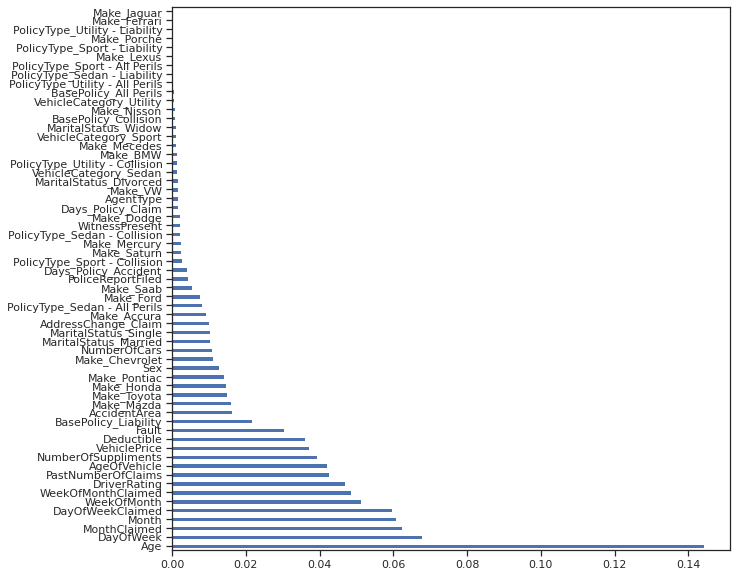

In [42]:
features = pd.Series(forest_reg.feature_importances_, index=X_train.columns)
features.nlargest(65).plot(kind='barh',figsize=(10,10))
plt.show()

## 3.2 RFE

In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = XGBClassifier()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

RFE(estimator=XGBClassifier())

In [44]:
X_train.columns[rfe.support_]

Index(['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth', 'AccidentArea',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'Deductible',
       'DriverRating', 'PoliceReportFiled', 'Make_Mazda', 'Make_Saab',
       'Make_VW', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'VehicleCategory_Sedan', 'BasePolicy_Collision',
       'BasePolicy_Liability'],
      dtype='object')

# 4. Modelling

Use the features selected by RFE

In [45]:
col = ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth', 'AccidentArea',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'Deductible',
       'DriverRating', 'PoliceReportFiled', 'Make_Mazda', 'Make_Saab',
       'Make_VW', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'VehicleCategory_Sedan', 'BasePolicy_Collision',
       'BasePolicy_Liability']

In [46]:
X_train = X_train[col]
X_val = X_val[col]
X_test = X_test[col]

Import Library

In [47]:
import warnings
import gc
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import diverging_palette

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import FeatureImportances

from sklearn import metrics
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import (ROCAUC)
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

## 4.1 Baseline Model

**The objective of the business is to minimize fraudulent claims, and at the same time not over predict frauds, the `f-beta score(f2)` will be used as the main metrics in evaluating the models, while recall and FPR will also be considered.**

In [48]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

**Performance of DummyClassifier**

In [49]:
dummy_predict = dummy_clf.predict(X_val)

print("Classification Report:\n{}\n".format(classification_report(y_val, dummy_predict)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, dummy_predict, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

Actual0_Predicted1 = metrics.confusion_matrix(y_val, dummy_predict)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, dummy_predict)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))

from sklearn.metrics import fbeta_score
f2 = fbeta_score(y_val, dummy_predict, beta=2)
print("F-beta score:",f2)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2140
           1       0.00      0.00      0.00       125

    accuracy                           0.94      2265
   macro avg       0.47      0.50      0.49      2265
weighted avg       0.89      0.94      0.92      2265


        pred:0  pred:1
true:0    2140       0
true:1     125       0


FPR (False Positive Rate): 0.0
F-beta score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4.2 Evaluation Metrics

#### ROC Curve

In [50]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### PR Curve

In [51]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

## 4.3 Dealing imbalanced data

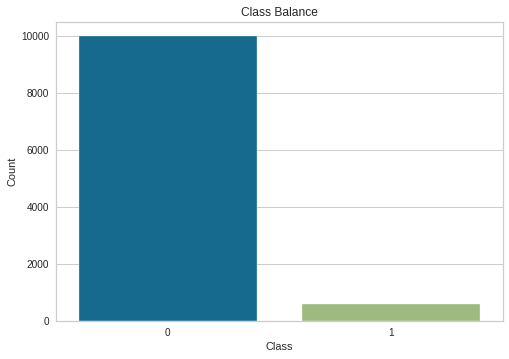

In [52]:
# We will graph the frequency of fraud and non fraud to see if the dataset is imbalanced
sns.countplot(x=y_train)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

As it is expected, our dataset is very inbalanced since we have a lot of cases in which we don't have fraud and few of fraud cases

**SMOTEENN**

In [53]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteen, y_train_smoteen = smote_enn.fit_resample(X_train, y_train)

In [54]:
y_train.value_counts()

0    9981
1     596
Name: FraudFound_P, dtype: int64

In [55]:
y_train_smoteen.value_counts()

1    9961
0    7197
Name: FraudFound_P, dtype: int64

In [56]:
y_val.value_counts()

0    2140
1     125
Name: FraudFound_P, dtype: int64

## 4.4 Models

### 4.4.1 Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

- **Build Model using train set**

In [146]:
LogReg = LogisticRegression(C=0.0001,random_state=42, max_iter=500)
model_LogReg = LogReg.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_LogReg = model_LogReg.predict(X_val)

- **Learning Curve (check overfitting)**

Using 200 samples

In [147]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

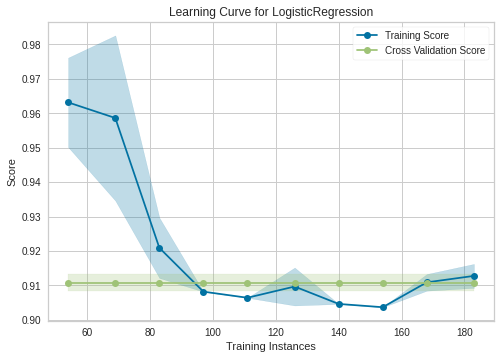

In [148]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_LogReg, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

not overfitted.

#### I. Scores

In [61]:
from sklearn.metrics import recall_score

In [149]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_LogReg)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_LogReg, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")
recall_logistic = recall_score(y_val, y_val_pred_LogReg)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_LogReg)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_LogReg)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_logistic = fbeta_score(y_val, y_val_pred_LogReg, beta=2)
print("F-beta score:",f2_logistic)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21      2140
           1       0.06      1.00      0.12       125

    accuracy                           0.17      2265
   macro avg       0.53      0.56      0.16      2265
weighted avg       0.95      0.17      0.20      2265


        pred:0  pred:1
true:0     251    1889
true:1       0     125


FPR (False Positive Rate): 0.88
F-beta score: 0.24860779634049326


#### II. Class Prediction Error

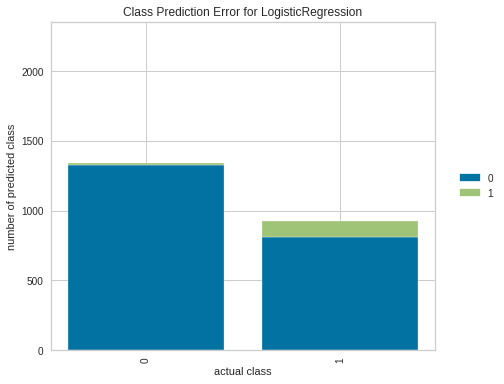

In [63]:
classes = ["0", "1"]

visualizer = ClassPredictionError(
    model_LogReg, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

#### III. Classification Report

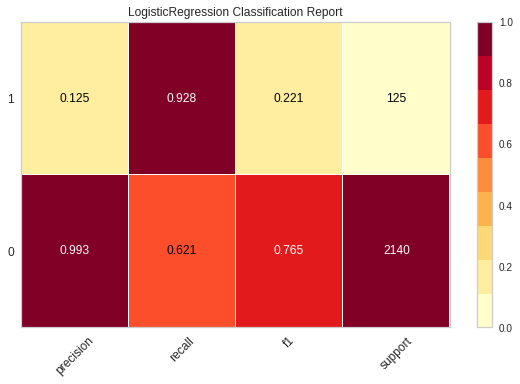

In [64]:
visualizer = ClassificationReport(
    model_LogReg, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_smoteen, y_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show()  

#### IV. Confusion Matrix

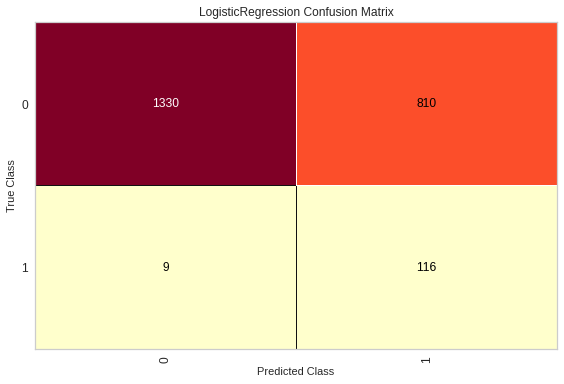

In [65]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_LogReg, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, y_train_smoteen)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

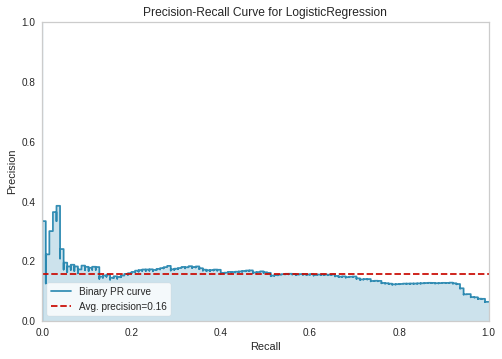

In [66]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_LogReg, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

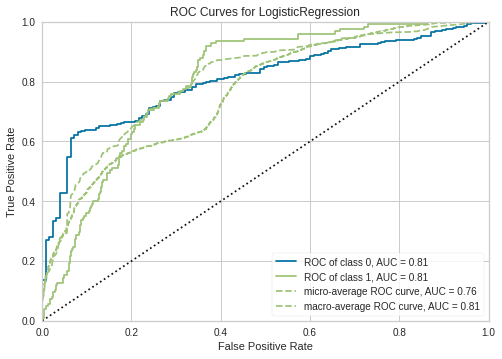

In [67]:
visualizerroc = ROCAUC(model_LogReg, classes=classes, is_fitted=True)

visualizerroc.fit(X_train_smoteen, y_train_smoteen)
visualizerroc.score(X_val, y_val)
visualizerroc.show()

### 4.4.2 KNN (K-Nearest Neighbors)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

- **Model Tuning**

In [ ]:
# K-fold cross validation for different n_neighbors
for i in range (1, 21):
    np.random.seed(42)
    knn = KNeighborsClassifier(n_neighbors=i)
    model_knn = knn.fit(X_train_smoteen, y_train_smoteen)
    y_val_pred_knn = model_knn.predict(X_val)
    scores = accuracy_score(y_val, y_val_pred_knn)
    print(i, ":", scores)

1 : 0.779690949227373
2 : 0.7911699779249448
3 : 0.7161147902869757
4 : 0.7324503311258278
5 : 0.6856512141280353
6 : 0.6971302428256071
7 : 0.6618101545253863
8 : 0.6750551876379691
9 : 0.6392935982339956
10 : 0.6512141280353201
11 : 0.6225165562913907
12 : 0.6335540838852097
13 : 0.6070640176600441
14 : 0.6194260485651214
15 : 0.5947019867549669
16 : 0.6052980132450331
17 : 0.5810154525386313
18 : 0.5938189845474614
19 : 0.5757174392935982
20 : 0.5876379690949227


- **Build Model using the tuned result**

In [69]:
np.random.seed(42)
KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN = KNN.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_KNN = model_KNN.predict(X_val)

- **Learning Curve (check overfitting)**

In [70]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

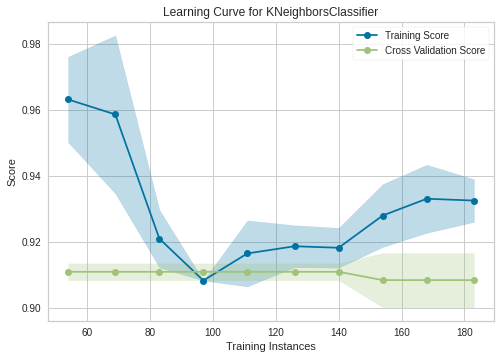

In [71]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_KNN, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

no obvious sign of overfitting.

#### I. Scores

In [72]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_KNN)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_KNN, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_knn = recall_score(y_val, y_val_pred_KNN)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_KNN)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_KNN)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_knn = fbeta_score(y_val, y_val_pred_KNN, beta=2)
print("F-beta score:",f2_knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2140
           1       0.12      0.43      0.19       125

    accuracy                           0.79      2265
   macro avg       0.54      0.62      0.53      2265
weighted avg       0.91      0.79      0.84      2265


        pred:0  pred:1
true:0    1738     402
true:1      71      54


FPR (False Positive Rate): 0.19
F-beta score: 0.2824267782426778


#### II. Class Prediction Error

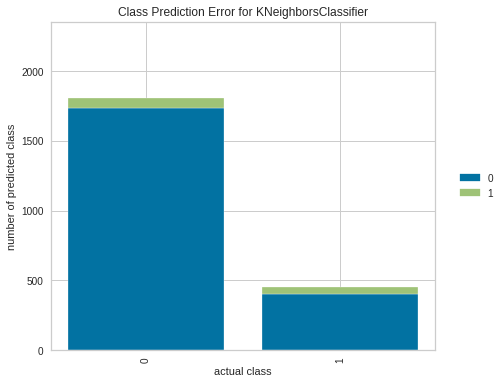

In [73]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_KNN, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

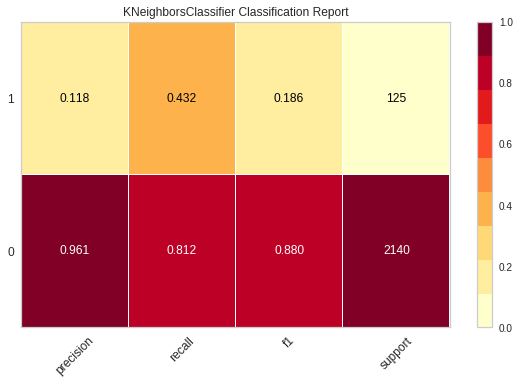

In [74]:
visualizer = ClassificationReport(model_KNN, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

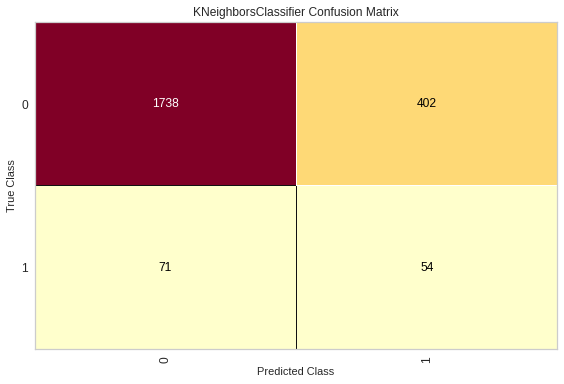

In [75]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_KNN, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

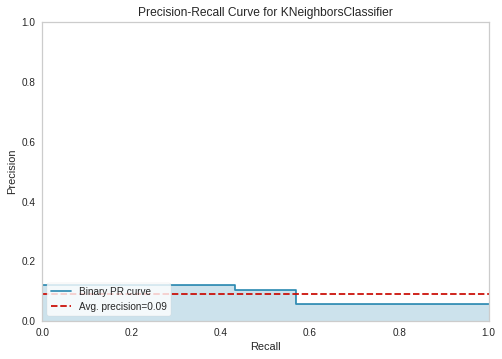

In [76]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_KNN, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

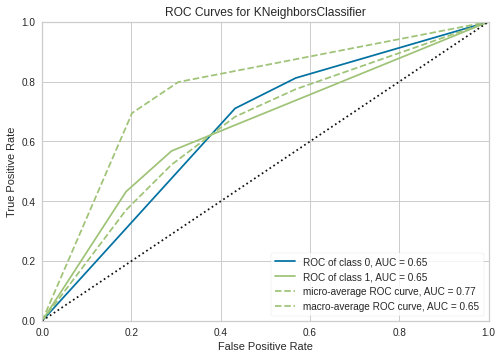

In [77]:
visualizer = ROCAUC(model_KNN, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### 4.4.3 Random Forest

- **Model Tunning**

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
params = {'n_estimators': range(50,200,50),
          #'min_samples_leaf': [3],
          'max_features': range(1,10),
          'max_depth': range(3,10),
         }

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=params, scoring=make_scorer(fbeta_score, beta=2), cv=kfold)
grid_search_rf.fit(X_train_smoteen, y_train_smoteen)
grid_search_rf.best_params_

{'max_depth': 9, 'max_features': 8, 'n_estimators': 150}

- **Build Model**


In [79]:
RF = RandomForestClassifier(max_depth=9, max_features=8, n_estimators=150)
model_RF = RF.fit(X_train_smoteen, y_train_smoteen)
y_val_pred_RF = model_RF.predict(X_val)

- **Learning Curve (check overfitting)**

In [80]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

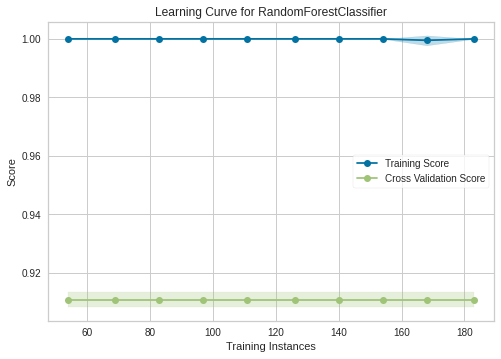

In [81]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_RF, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

Overfitted! Adjust the parameters to reduce overfitting

In [82]:
RF = RandomForestClassifier(max_depth=3, max_features=3, n_estimators=50)
model_RF = RF.fit(X_train_smoteen, y_train_smoteen)
y_val_pred_RF = model_RF.predict(X_val)

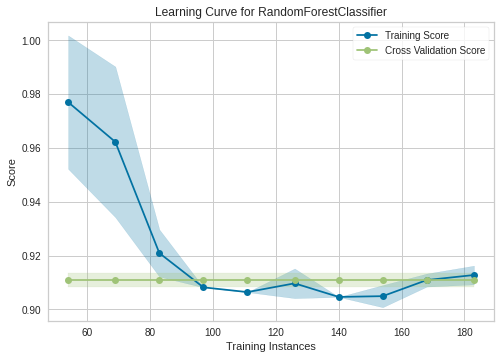

In [83]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_RF, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [84]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_RF)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_RF, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_rf = recall_score(y_val, y_val_pred_RF)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_RF)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_RF)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_rf = fbeta_score(y_val, y_val_pred_RF, beta=2)
print("F-beta score:",f2_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2140
           1       0.11      0.90      0.20       125

    accuracy                           0.61      2265
   macro avg       0.55      0.75      0.47      2265
weighted avg       0.94      0.61      0.71      2265


        pred:0  pred:1
true:0    1267     873
true:1      12     113


FPR (False Positive Rate): 0.41
F-beta score: 0.3802153432032302


#### II. Class Prediction Error

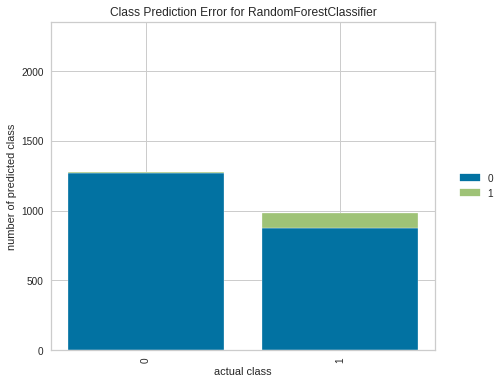

In [85]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_RF, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

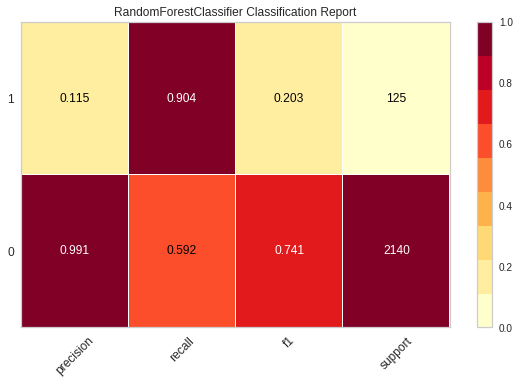

In [86]:
visualizer = ClassificationReport(model_RF, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

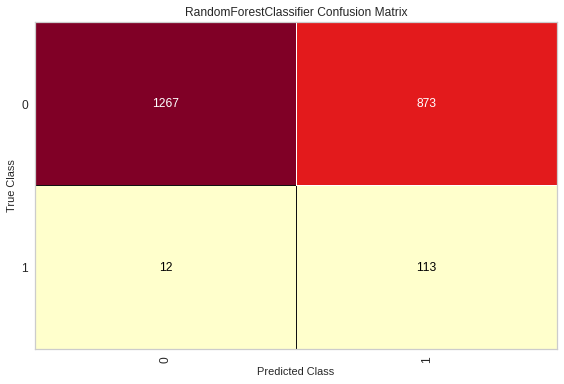

In [87]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_RF, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

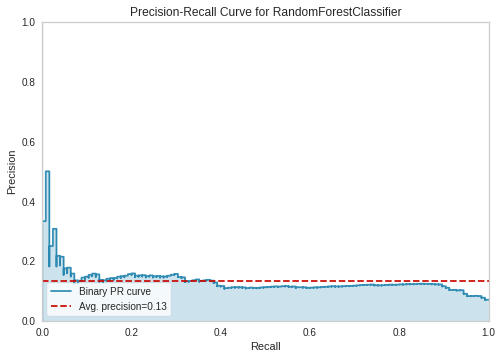

In [88]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_RF, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

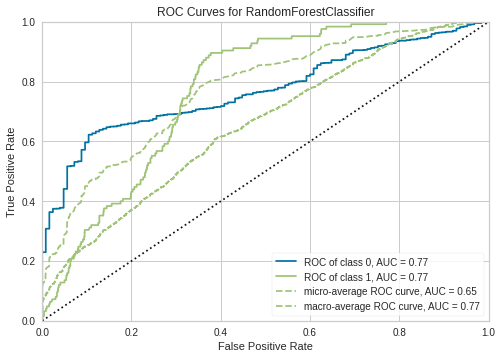

In [89]:
visualizer = ROCAUC(model_RF, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### 4.4.4 XGBoost

In [90]:
import xgboost as xgb

- **Model Tuning**

In [ ]:
XGB = xgb.XGBClassifier()
params = {'n_estimators': range(50,200,50),
          #'min_samples_leaf': [3],
          #'max_features': range(1,10),
          'max_depth': range(3,10),
          'learning_rate': [0.001,0.01,0.1,1]
         }
grid_search_xgb = GridSearchCV(estimator=XGB, param_grid=params, scoring=make_scorer(fbeta_score, beta=2), cv=kfold)
grid_search_xgb.fit(X_train_smoteen, y_train_smoteen)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': range(3, 10),
                         'n_estimators': range(50, 200, 50)},
             scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
# Print out the tunning result
grid_search_xgb.best_score_

0.972598280455725

In [ ]:
# Print out the tunning parameters
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}

- **Build Model**

In [91]:
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=50)
model_XGB = XGB.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_XGB = model_XGB.predict(X_val)

- **Learning Curve (check overfitting)**

In [92]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

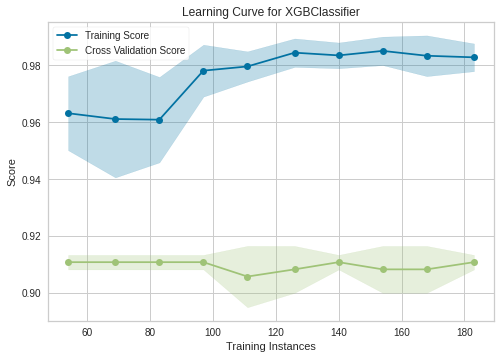

In [93]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_XGB, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

overfitted! Adjust the parameters

In [172]:
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=60)
model_XGB = XGB.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_XGB = model_XGB.predict(X_val)

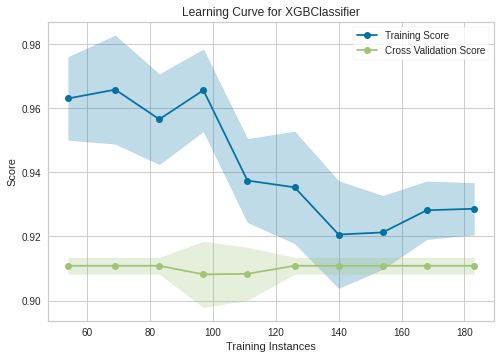

In [173]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_XGB, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [174]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_XGB)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_XGB, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_xgb = recall_score(y_val, y_val_pred_XGB)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_XGB)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_XGB)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_xgb = fbeta_score(y_val, y_val_pred_XGB, beta=2)
print("F-beta score:",f2_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.80      2140
           1       0.12      0.81      0.22       125

    accuracy                           0.68      2265
   macro avg       0.55      0.74      0.51      2265
weighted avg       0.94      0.68      0.76      2265


        pred:0  pred:1
true:0    1432     708
true:1      24     101


FPR (False Positive Rate): 0.33
F-beta score: 0.38579067990832694


#### II. Class Prediction Error

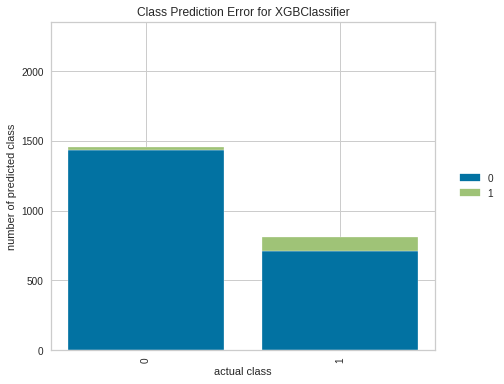

In [175]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_XGB, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

#### III. Classification Report

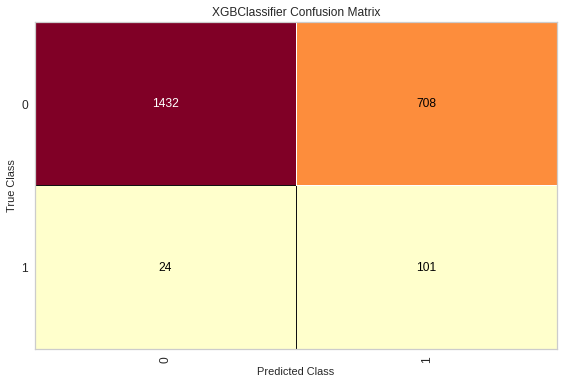

In [176]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_XGB, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

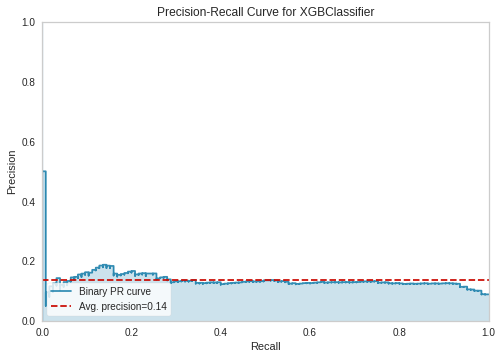

In [177]:
viz = PrecisionRecallCurve(model_XGB, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_test, y_test)
viz.show()

#### VI. ROC-AUC

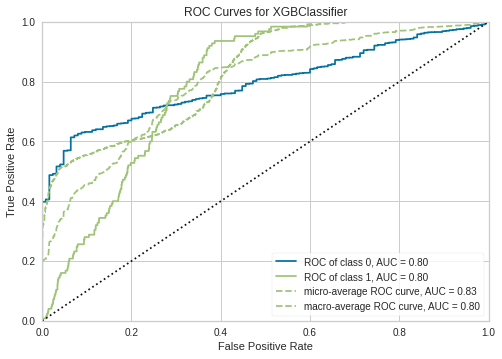

In [178]:
visualizerroc2 = ROCAUC(model_XGB, classes=classes, is_fitted=True)

visualizerroc2.fit(X_train_smoteen, y_train_smoteen)
visualizerroc2.score(X_test, y_test)
visualizerroc2.show()

- **Feature Importance**

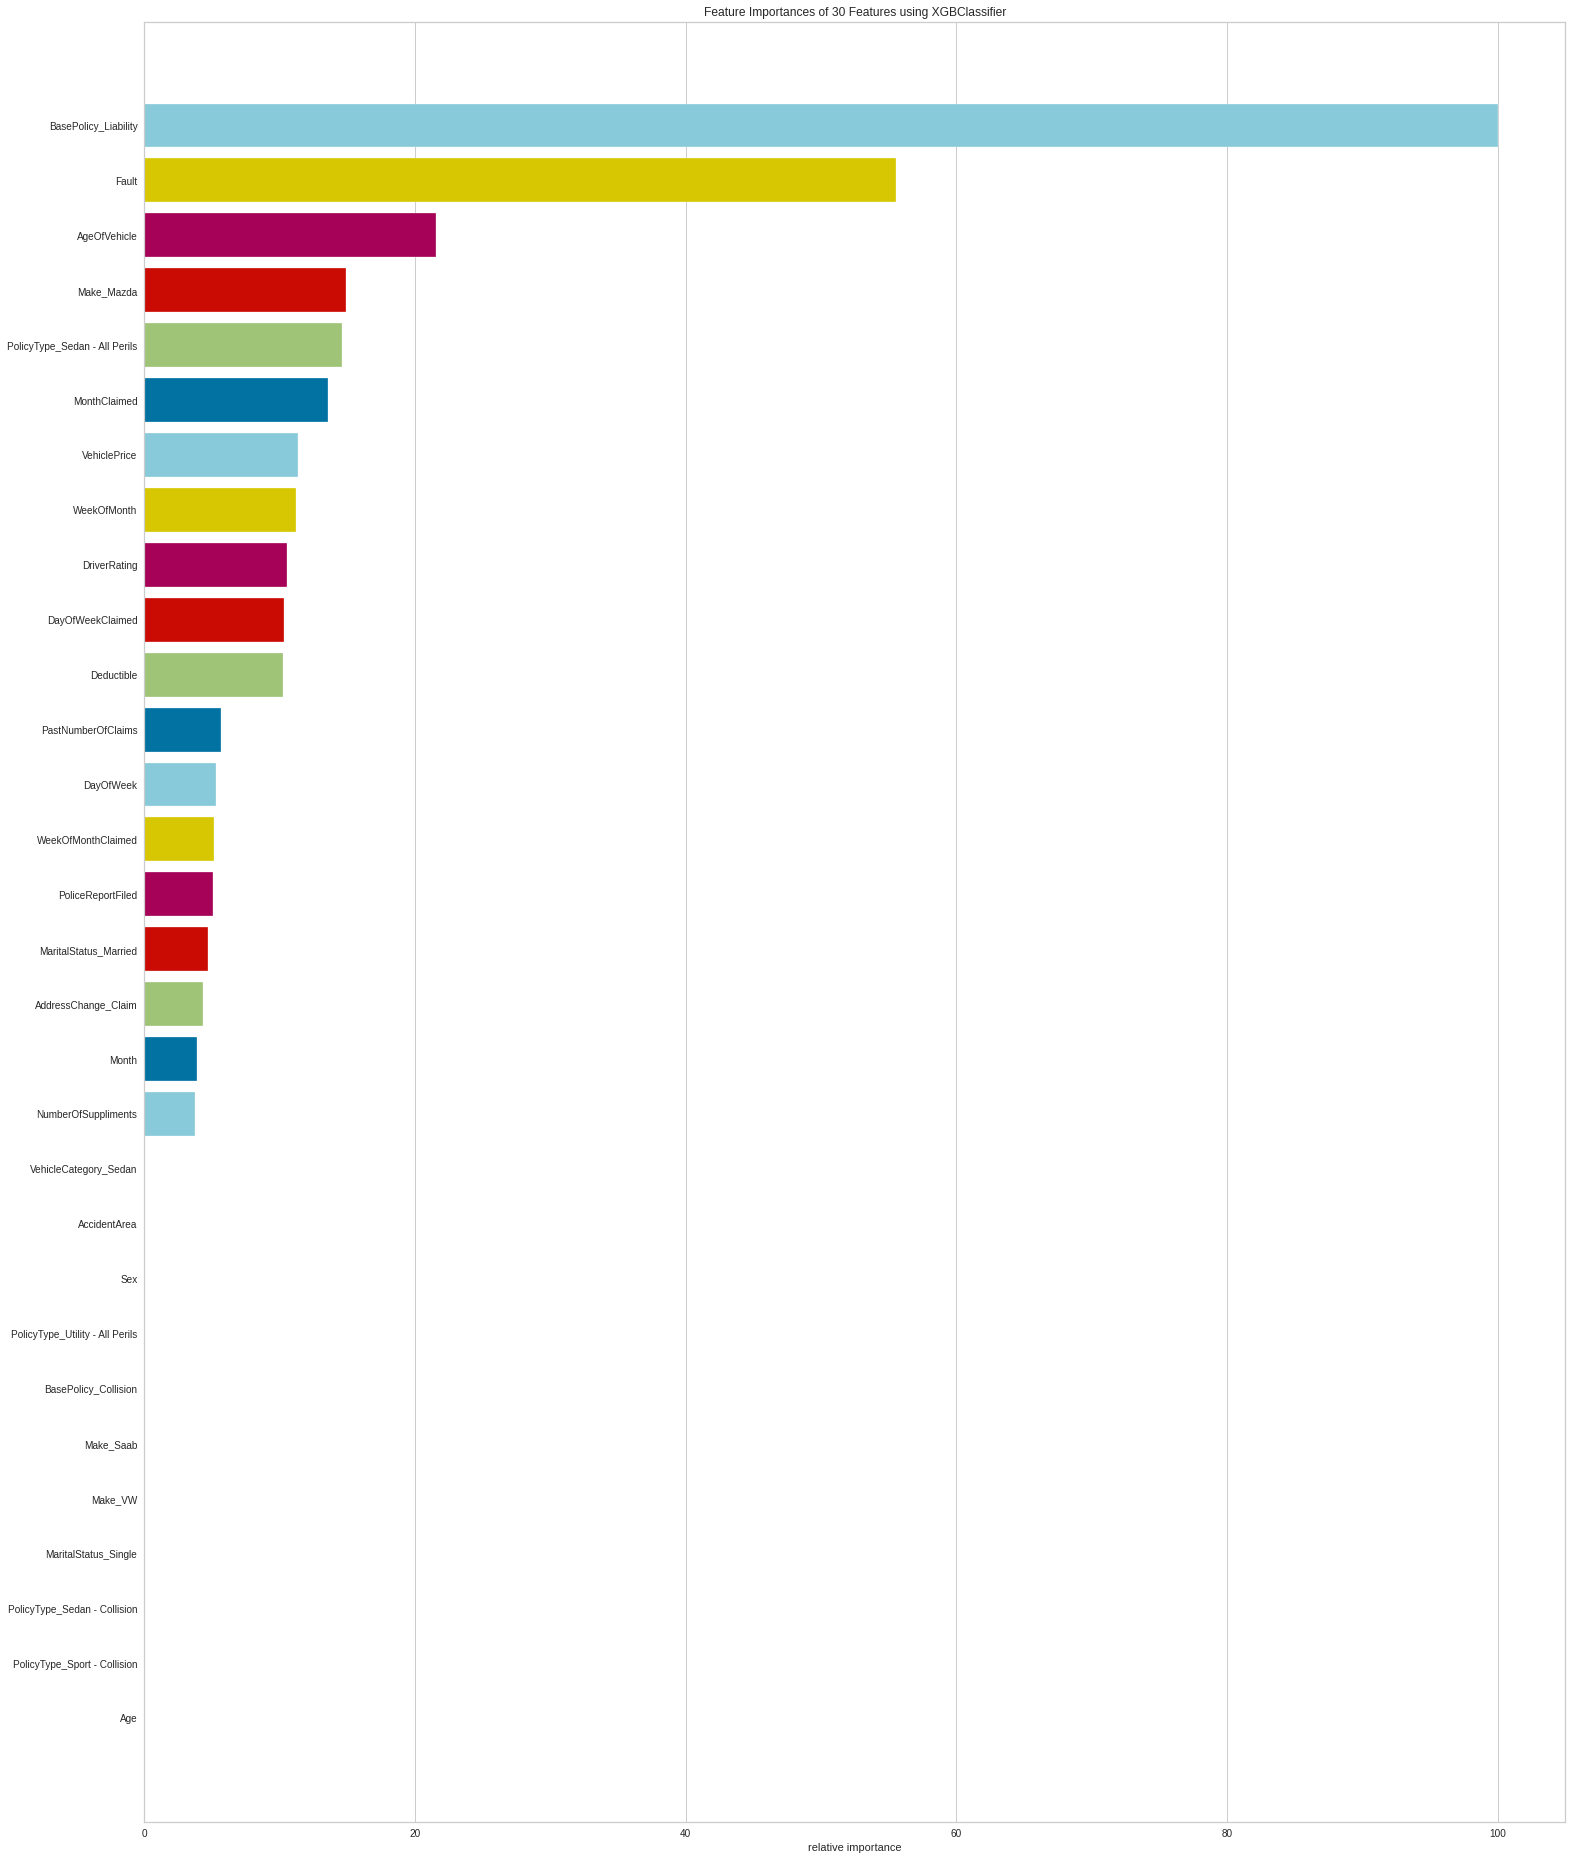

In [111]:
fig = plt.figure(figsize=(22, 26))
viz4 = FeatureImportances(model_XGB, labels=X_train_smoteen.columns)
viz4.fit(X_train_smoteen, y_train_smoteen)
viz4.poof()

### 4.4.5 ANN (Artificial Neural Network)

In [112]:
from sklearn.neural_network import MLPClassifier

- **Model Tuning**

In [ ]:
# Cross-validate with different size of one hidden layer
for i in range (2, 21):    
    ANN1 = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000, random_state=42)
    scores = cross_val_score(estimator=ANN1, X=X_train_smoteen, y=y_train_smoteen, cv=5)
    print(i, ":", np.average(scores))

2 : 0.8669432311592032
3 : 0.8688657475818655
4 : 0.8814546038824675
5 : 0.8844271923549101
6 : 0.888623506096546
7 : 0.8794737614469472
8 : 0.8963172744869043
9 : 0.9098963142172118
10 : 0.910712572669728
11 : 0.9108291907257223
12 : 0.910304460428331
13 : 0.9149089033962248
14 : 0.9185803000069978
15 : 0.917647644301681
16 : 0.9112366235726773
17 : 0.9183472167587585
18 : 0.9256907742990517
19 : 0.934782991224262
20 : 0.9356570831286657


In [ ]:
# Cross-validate with different size of two hidden layers
for i in range (2, 21):    
    ANN2 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=1000, random_state=42)
    scores = cross_val_score(estimator=ANN2, X=X_train_smoteen, y=y_train_smoteen, cv=5)
    print(i, ":", np.average(scores))

2 : 0.8700315205051433
3 : 0.8609398301106259
4 : 0.8820959522358531
5 : 0.8903719446782695
6 : 0.88751627998932
7 : 0.8969580453550142
8 : 0.9018534050230349
9 : 0.9204454925236039
10 : 0.9168904082413263
11 : 0.9290711013459484
12 : 0.9296543444896695
13 : 0.9335006002449896
14 : 0.9333260638128025
15 : 0.9319855506390045
16 : 0.9406692646710134
17 : 0.9400285107877646
18 : 0.9459729573836249
19 : 0.942300949317854
20 : 0.9442247905596783


- **Build Model**

In [113]:
ANN = MLPClassifier(hidden_layer_sizes=(18,18), max_iter=1000, random_state=42)
model_ANN = ANN.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_ANN = model_ANN.predict(X_val)

- **Learning Curve (check overfitting)**

In [114]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

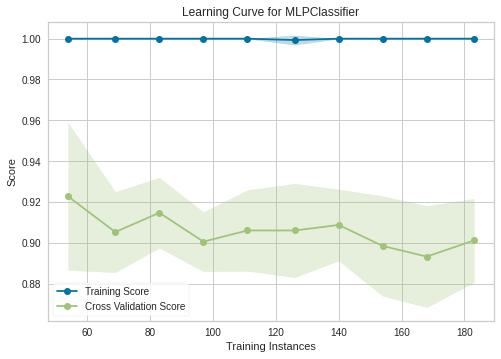

In [115]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_ANN, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

Overfitted! Adjust parameters to reduce overfitting

In [181]:
ANN = MLPClassifier(hidden_layer_sizes=(2,3), max_iter=1000)
model_ANN = ANN.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_ANN = model_ANN.predict(X_val)

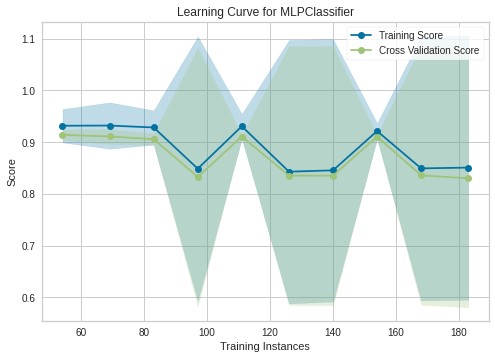

In [182]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_ANN, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [183]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_ANN)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_ANN, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_ann = recall_score(y_val, y_val_pred_ANN)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_ANN)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_ANN)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_ann = fbeta_score(y_val, y_val_pred_ANN, beta=2)
print("F-beta score:",f2_ann)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.77      2140
           1       0.12      0.84      0.21       125

    accuracy                           0.65      2265
   macro avg       0.55      0.74      0.49      2265
weighted avg       0.94      0.65      0.74      2265


        pred:0  pred:1
true:0    1366     774
true:1      20     105


FPR (False Positive Rate): 0.36
F-beta score: 0.38071065989847724


#### II. Class Prediction Error

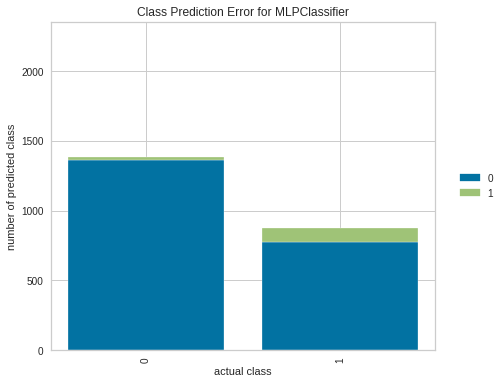

In [186]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_ANN, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

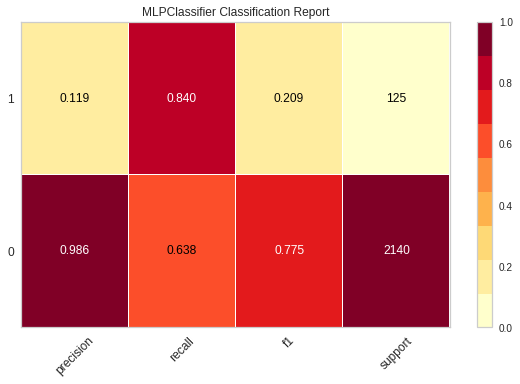

In [187]:
visualizer = ClassificationReport(model_ANN, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

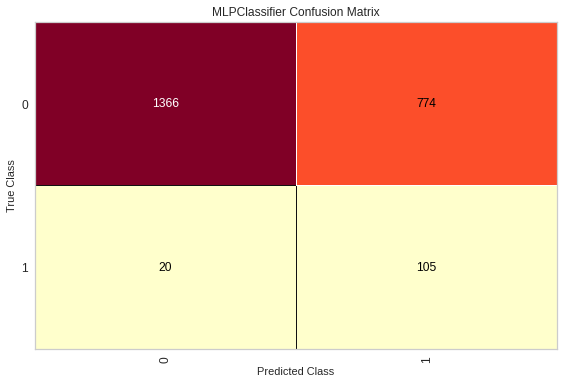

In [188]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_ANN, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

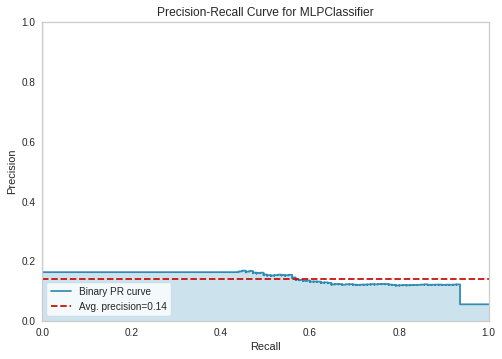

In [189]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_ANN, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

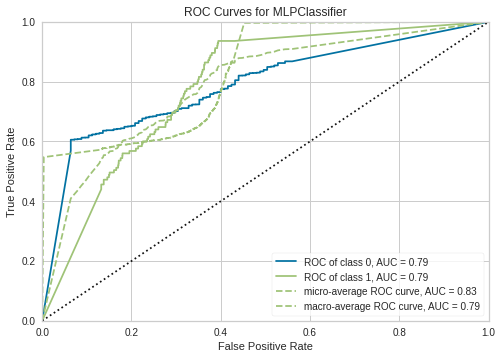

In [190]:
visualizer = ROCAUC(model_ANN, classes=classes, is_fitted=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### 4.4.6 SVM (Support Vector Machine)

In [124]:
from sklearn.svm import SVC

- **Model Tuning**

In [ ]:
# Build the SVM model using a linear kernel
C_list = [0.1, 1]

for i in C_list:
    SVM_L = SVC(kernel="linear", random_state=42, C=i)
    model_SVM_L = SVM_L.fit(X_train_smoteen, y_train_smoteen)
    y_val_pred_SVM_L = model_SVM_L.predict(X_val)
    scores = accuracy_score(y_val, y_val_pred_SVM_L)
    print(i, ":", scores)

0.1 : 0.6233995584988963
1 : 0.6233995584988963


In [ ]:
# Build the SVM with a RBF kernel (radial base function)
gamma_list = [0.1, 1, "auto"]
C_list = [0.1, 1]

for i in gamma_list:
    for j in C_list:
        SVM_RBF = SVC(kernel="rbf", random_state=42, gamma=i, C=j)
        model_SVM_RBF = SVM_RBF.fit(X_train_smoteen, y_train_smoteen)
        y_val_pred_SVM_RBF = model_SVM_RBF.predict(X_val)
        scores = accuracy_score(y_val, y_val_pred_SVM_RBF)
        print("gamma", i, "C", j, ":", scores)

gamma 0.1 C 0.1 : 0.6392935982339956
gamma 0.1 C 1 : 0.7479028697571743
gamma 1 C 0.1 : 0.891832229580574
gamma 1 C 1 : 0.9125827814569536
gamma auto C 0.1 : 0.6163355408388521
gamma auto C 1 : 0.6626931567328919


- **Build Model**

In [125]:
SVM = SVC(kernel="rbf", random_state=42, gamma=1, C=0.1) # not gamma=1 C=1 because it's overfitting
model_SVM = SVM.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_SVM = model_SVM.predict(X_val)

- **Learning Curve (check overfitting)**

In [126]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

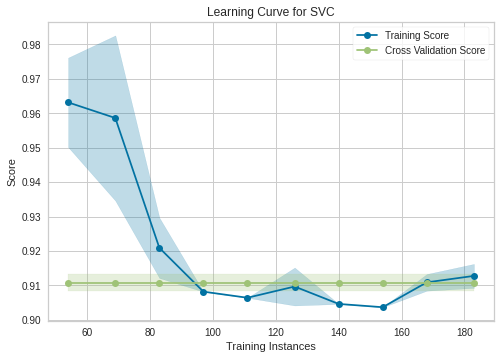

In [127]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_SVM, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [128]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_SVM)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_SVM, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_svm = recall_score(y_val, y_val_pred_SVM)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_SVM)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_SVM)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_svm = fbeta_score(y_val, y_val_pred_SVM, beta=2)
print("F-beta score:",f2_svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2140
           1       0.14      0.18      0.16       125

    accuracy                           0.89      2265
   macro avg       0.54      0.56      0.55      2265
weighted avg       0.91      0.89      0.90      2265


        pred:0  pred:1
true:0    1997     143
true:1     102      23


FPR (False Positive Rate): 0.07
F-beta score: 0.1726726726726727


#### II. Class Prediction Error

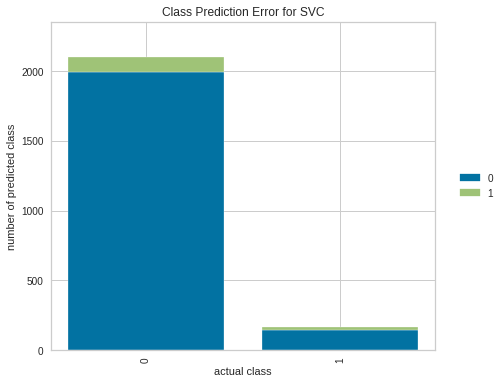

In [129]:
classes = ["0", "1"]

visualizer = ClassPredictionError(model_SVM, classes=classes, is_fitted=True)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_val, y_val)

visualizer.show()

#### III. Classification Report

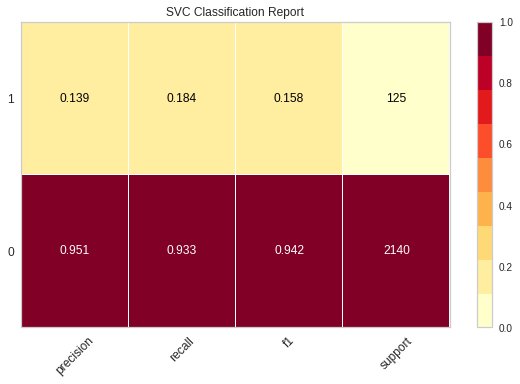

In [130]:
visualizer = ClassificationReport(model_SVM, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show() 

#### IV. Confusion Matrix

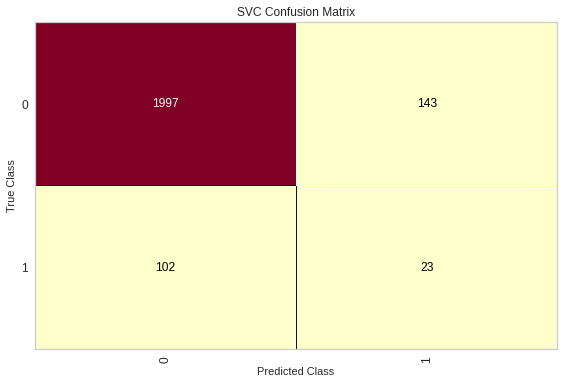

In [131]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_SVM, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

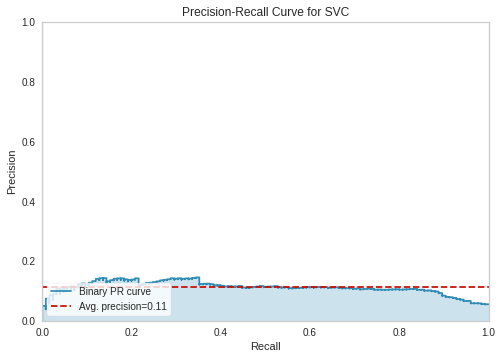

In [132]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_SVM, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

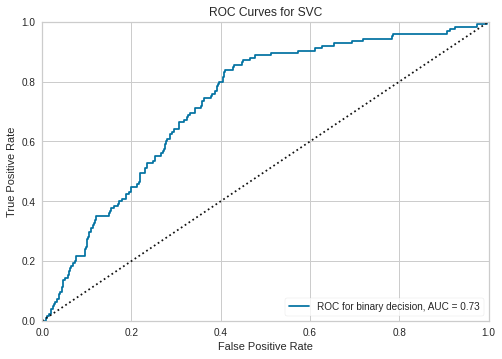

In [133]:
visualizer = ROCAUC(model_SVM, classes=classes, is_fitted=True, binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

###  4.4.7. LDA (Linear Discriminant Analysis)

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

- **Build Model**

In [135]:
LDA = LDA()
model_LDA = LDA.fit(X_train_smoteen, y_train_smoteen)

y_val_pred_LDA = model_LDA.predict(X_val)

- **Learning Curve (check overfitting)**

In [136]:
X_train_small = X_train.iloc[:200,]
y_train_small = y_train.iloc[:200]

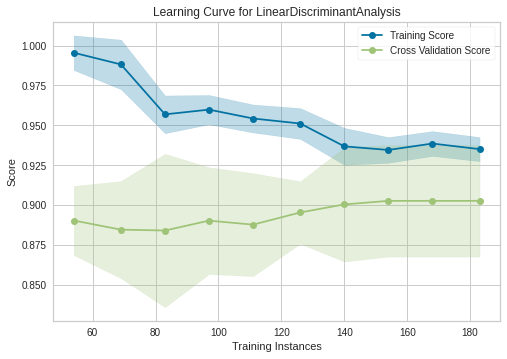

In [137]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_LDA, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 

#### I. Scores

In [138]:
print("Classification Report:\n{}\n".format(classification_report(y_val, y_val_pred_LDA)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_LDA, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_lda = recall_score(y_val, y_val_pred_LDA)

Actual0_Predicted1 = metrics.confusion_matrix(y_val, y_val_pred_LDA)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_val, y_val_pred_LDA)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_lda = fbeta_score(y_val, y_val_pred_LDA, beta=2)
print("F-beta score:",f2_lda)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.76      2140
           1       0.12      0.94      0.22       125

    accuracy                           0.63      2265
   macro avg       0.56      0.77      0.49      2265
weighted avg       0.95      0.63      0.73      2265


        pred:0  pred:1
true:0    1305     835
true:1       8     117


FPR (False Positive Rate): 0.39
F-beta score: 0.40289256198347106


#### II. Class Prediction Error

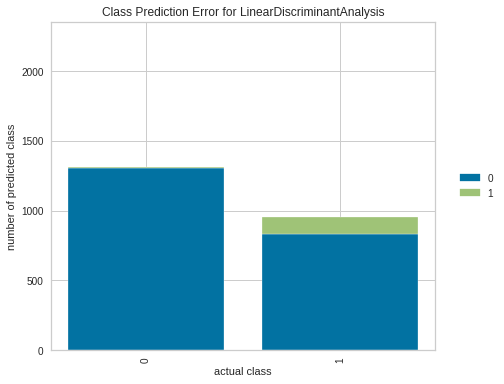

In [139]:
classes = ["0", "1"]

visualizer = ClassPredictionError(
    model_LDA, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

#### III. Classification Report

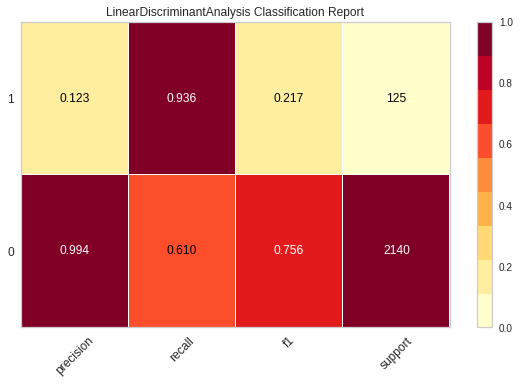

In [140]:
visualizer = ClassificationReport(
    model_LDA, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_smoteen, y_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show()  

#### IV. Confusion Matrix

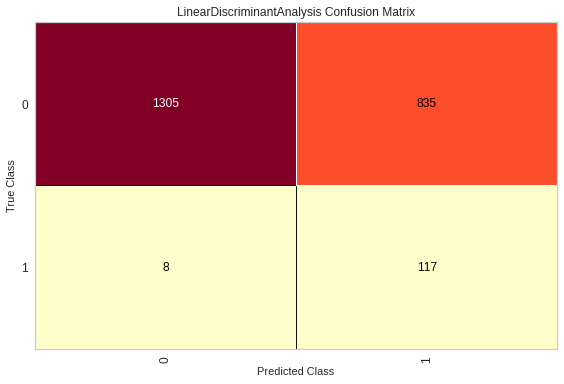

In [141]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_LDA, classes=[0,1], is_fitted=True)
cm.fit(X_train_smoteen, y_train_smoteen)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_val, y_val)
cm.show()

#### V. PR Curve

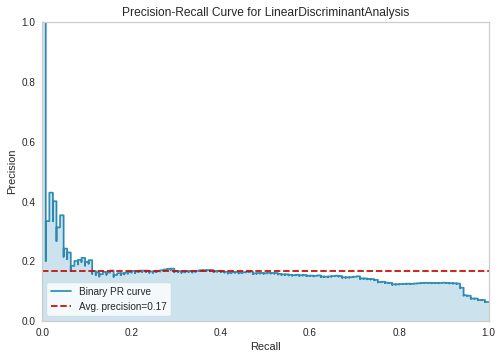

In [142]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_LDA, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_val, y_val)
viz.show()

#### VI. ROC-AUC

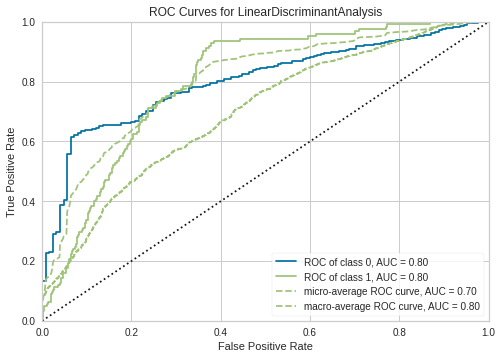

In [143]:
visualizerroc = ROCAUC(model_LDA, classes=classes, is_fitted=True)

visualizerroc.fit(X_train_smoteen, y_train_smoteen)
visualizerroc.score(X_val, y_val)
visualizerroc.show()

## Model Selection

In [184]:
name = ['Logistic_Regression','KNN','Random_forest','XGBoost','ANN','SVM','LDA']
f_best = [f2_logistic,f2_knn,f2_rf,f2_xgb,f2_ann,f2_svm,f2_lda]
recall = [recall_logistic,recall_knn,recall_rf,recall_xgb,recall_ann,recall_svm,recall_lda]

In [185]:
df = pd.DataFrame({'Model': name, 'F2_score': f_best,'Recall':recall})
df = df.sort_values(by='F2_score', ascending=False)
df

,Model,F2_score,Recall
6,LDA,0.402893,0.936
3,XGBoost,0.385791,0.808
4,ANN,0.380711,0.840
2,Random_forest,0.380215,0.904
1,KNN,0.282427,0.432
0,Logistic_Regression,0.248608,1.000
5,SVM,0.172673,0.184


**Based on the above table, LDA and XGBOOST are selected as our final candidate models.**

## Evaluate the model using the test set

####LDA

In [191]:
y_test_pred_LDA = model_LDA.predict(X_test)

print("Classification Report:\n{}\n".format(classification_report(y_test, y_test_pred_LDA)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred_LDA, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_lda = recall_score(y_test, y_test_pred_LDA)

Actual0_Predicted1 = metrics.confusion_matrix(y_test, y_test_pred_LDA)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_test, y_test_pred_LDA)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_lda = fbeta_score(y_test, y_test_pred_LDA, beta=2)
print("F-beta score:",f2_lda)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.76      2140
           1       0.12      0.93      0.22       125

    accuracy                           0.63      2265
   macro avg       0.56      0.77      0.49      2265
weighted avg       0.95      0.63      0.73      2265


        pred:0  pred:1
true:0    1305     835
true:1       9     116


FPR (False Positive Rate): 0.39
F-beta score: 0.39972432804962094


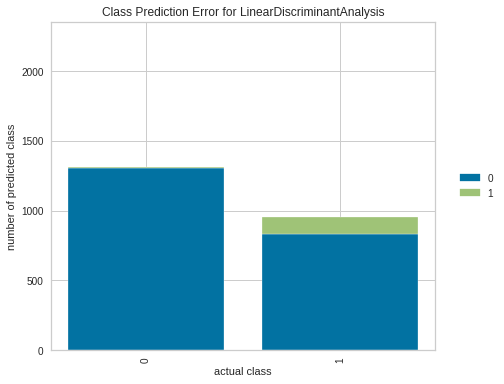

In [192]:
classes = ["0", "1"]
visualizer = ClassPredictionError(model_LDA, classes=classes, is_fitted=True)

visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_test, y_test)
visualizer.show()

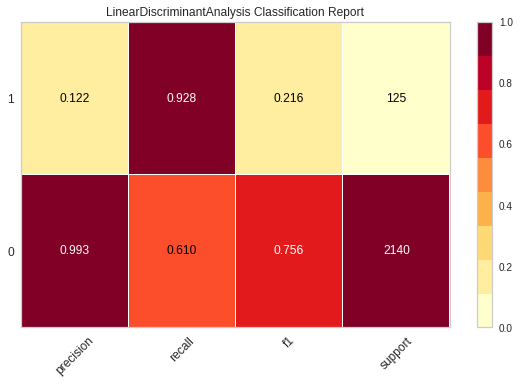

In [193]:
visualizer = ClassificationReport(model_LDA, classes=classes, support=True, is_fitted=True)

visualizer.fit(X_train_smoteen, y_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

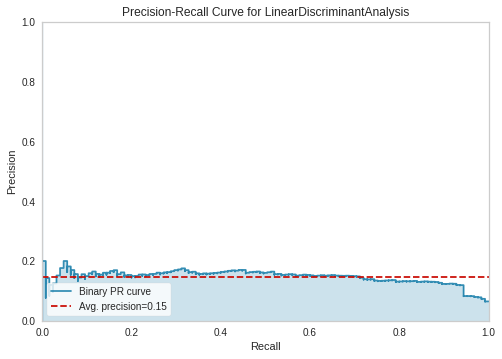

In [198]:
#PR Curve
viz = PrecisionRecallCurve(model_LDA, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_test, y_test)
viz.show()

####XGBOOST

In [ ]:
y_test_pred_XGB = model_XGB.predict(X_test)

print("Classification Report:\n{}\n".format(classification_report(y_test, y_test_pred_XGB)))

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred_XGB, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))
print("\n")

recall_xgb = recall_score(y_test, y_test_pred_XGB)

Actual0_Predicted1 = metrics.confusion_matrix(y_test, y_test_pred_XGB)[0][1]
Actual0_Predicted0 = metrics.confusion_matrix(y_test, y_test_pred_XGB)[0][0]
print("FPR (False Positive Rate):", round(Actual0_Predicted1/(Actual0_Predicted0+Actual0_Predicted1),2))
f2_xgb = fbeta_score(y_test, y_test_pred_XGB, beta=2)
print("F-beta score:",f2_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      2140
           1       0.12      0.81      0.21       125

    accuracy                           0.67      2265
   macro avg       0.55      0.74      0.50      2265
weighted avg       0.94      0.67      0.76      2265


        pred:0  pred:1
true:0    1425     715
true:1      24     101


FPR (False Positive Rate): 0.33
F-beta score: 0.3837386018237082


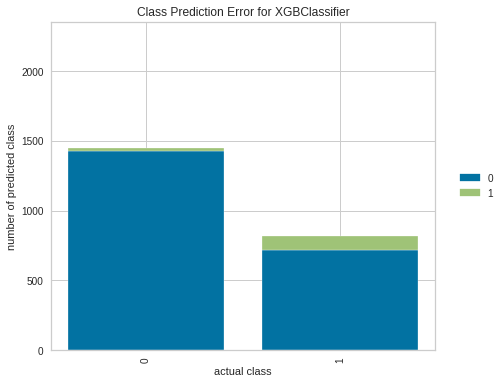

In [197]:
classes = ["0", "1"]
visualizer = ClassPredictionError(model_XGB, classes=classes, is_fitted=True)

visualizer.fit(X_train_smoteen, y_train_smoteen)
visualizer.score(X_test, y_test)
visualizer.show()

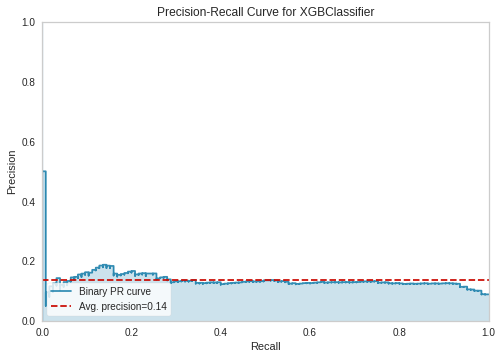

In [199]:
viz = PrecisionRecallCurve(model_XGB, is_fitted=True)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.score(X_test, y_test)
viz.show()

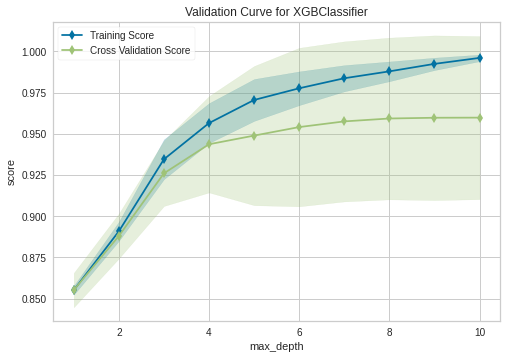

In [201]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    model_XGB, 
    param_name="max_depth",
    param_range=np.arange(1, 11), 
    cv=5, 
    scoring="f1_weighted",
    np_jobs=8
)

# Fit and show the visualizer
viz.fit(X_train_smoteen, y_train_smoteen)
viz.poof()